In [27]:
# Christopher Figueroa
# Aircraft Health predictor neural network

# imports for predictor neural network
# source: towarddatascience.com
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

# import for simple manual dataframe
from sklearn import preprocessing

In [28]:
# reads the data
df = pd.read_csv('Maintenance.csv')

# checks the datatypes of the file
df.dtypes

Vibration              float64
Temperature              int64
Pressure_Difference    float64
Electric_Flow            int64
Rotation                 int64
Maintenance              int64
dtype: object

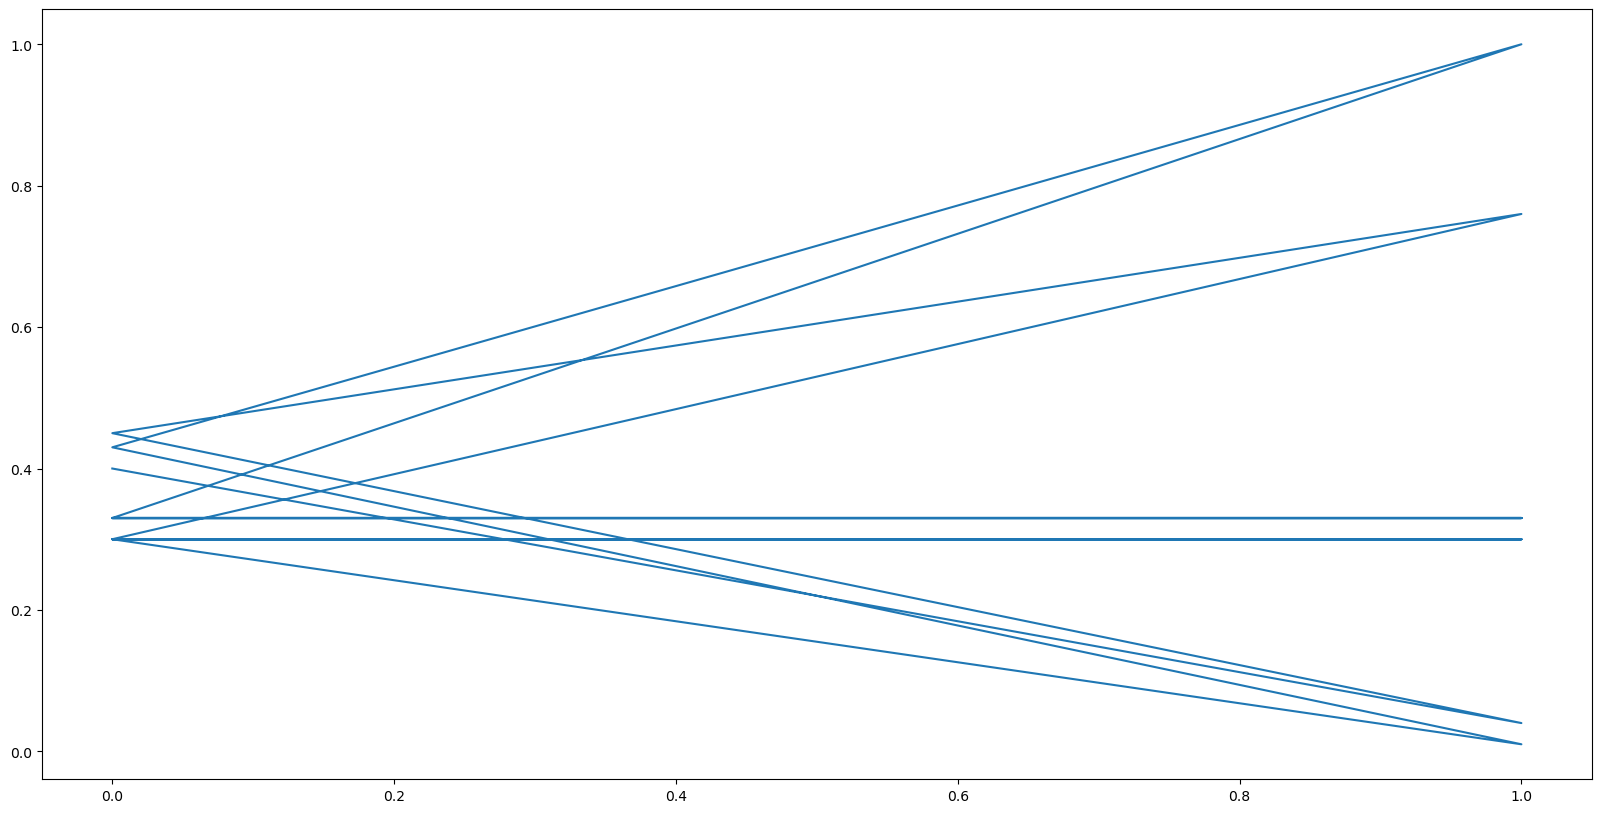

In [29]:
# defines the dataframe's index value
df.index = df['Maintenance']

# visualizes the vibration data
plt.plot(df["Vibration"],label='Vibration Maintenance')

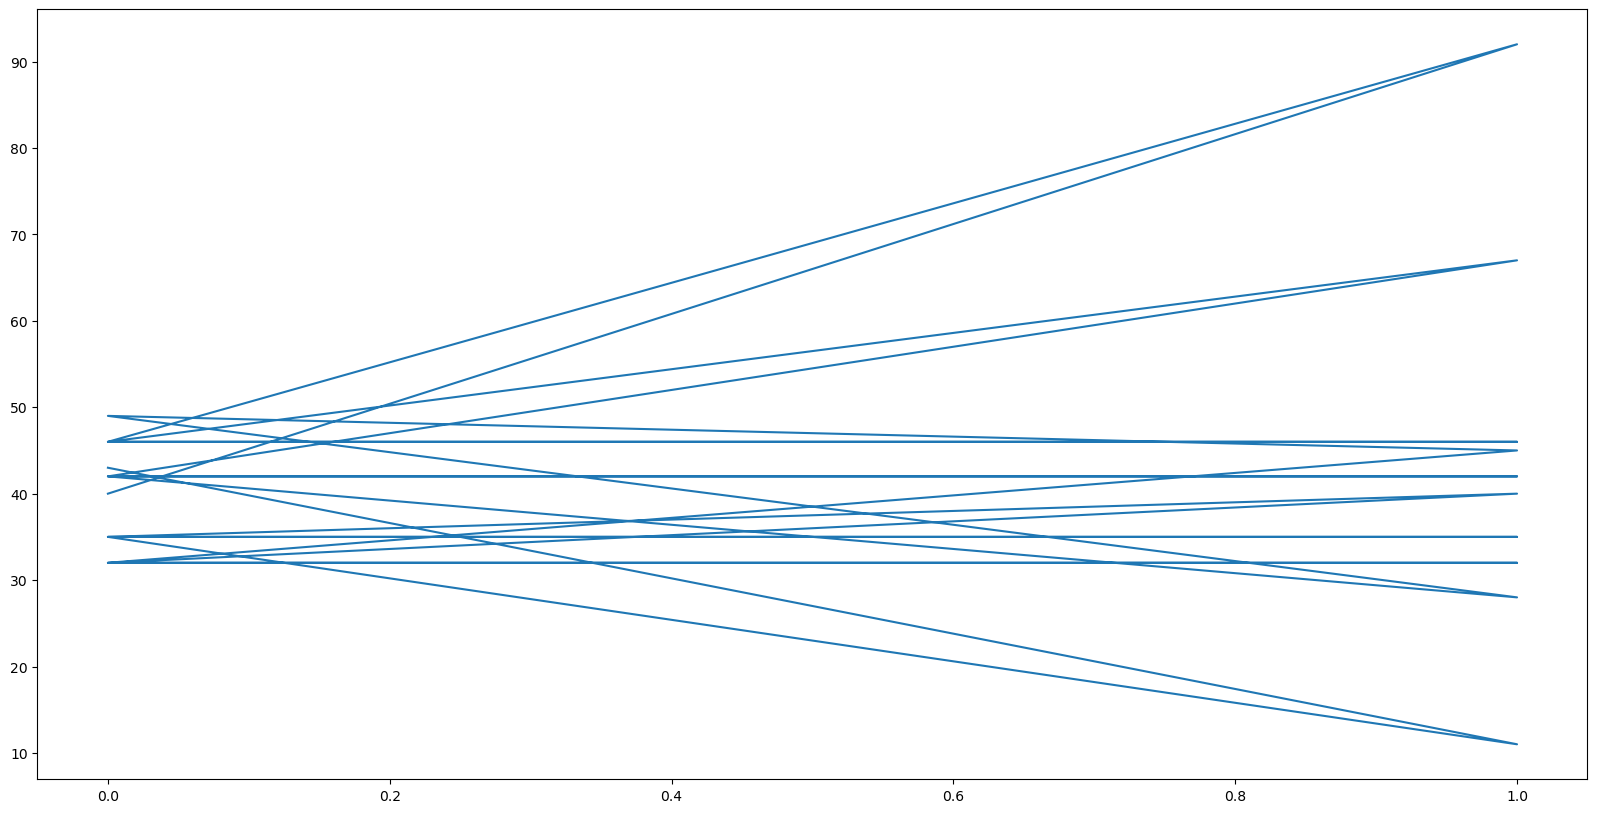

In [30]:
# visualizes the temperature data
df.index = df['Maintenance']
plt.plot(df["Temperature"],label='Temperature Maintenance')

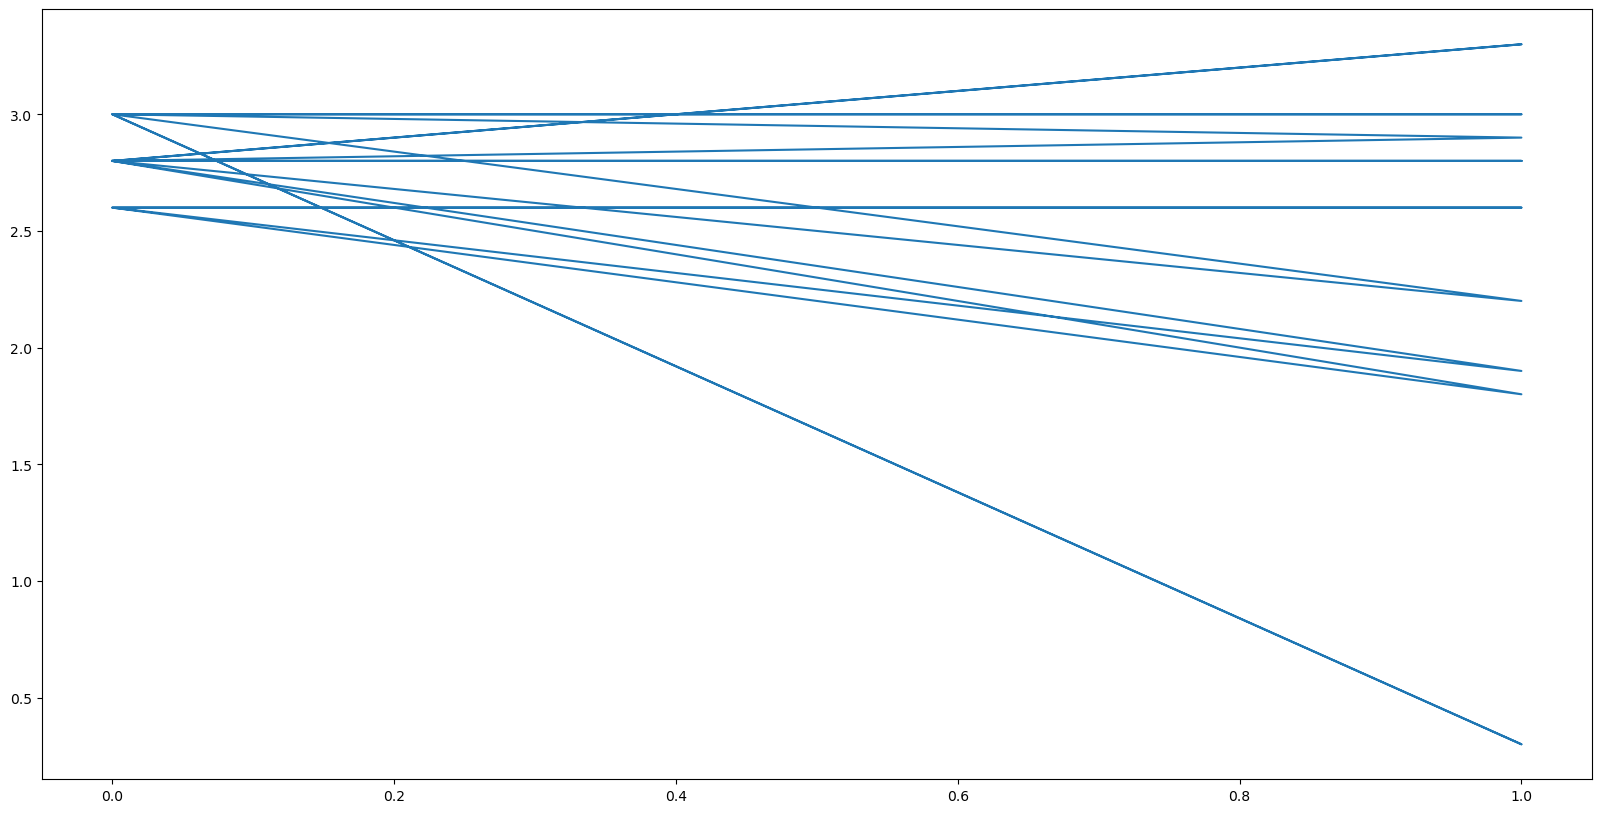

In [31]:
# visualizes the pressure difference
df.index = df['Maintenance']
plt.plot(df["Pressure_Difference"],label='Pressure Maintenance')

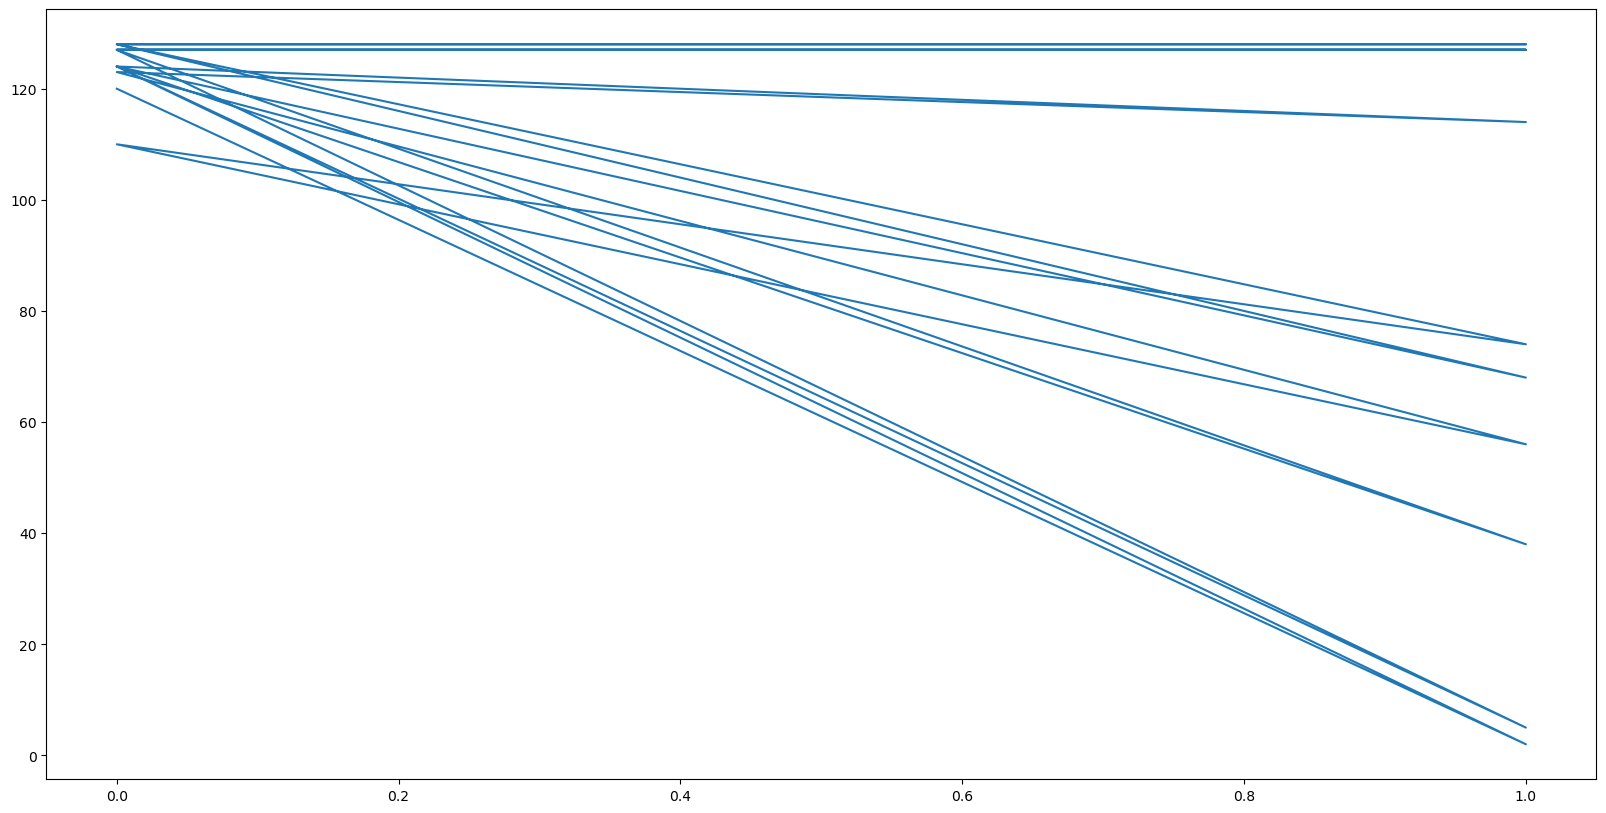

In [32]:
# visualizes the electric flow
df.index = df['Maintenance']
plt.plot(df["Electric_Flow"],label='Electric Maintenance')

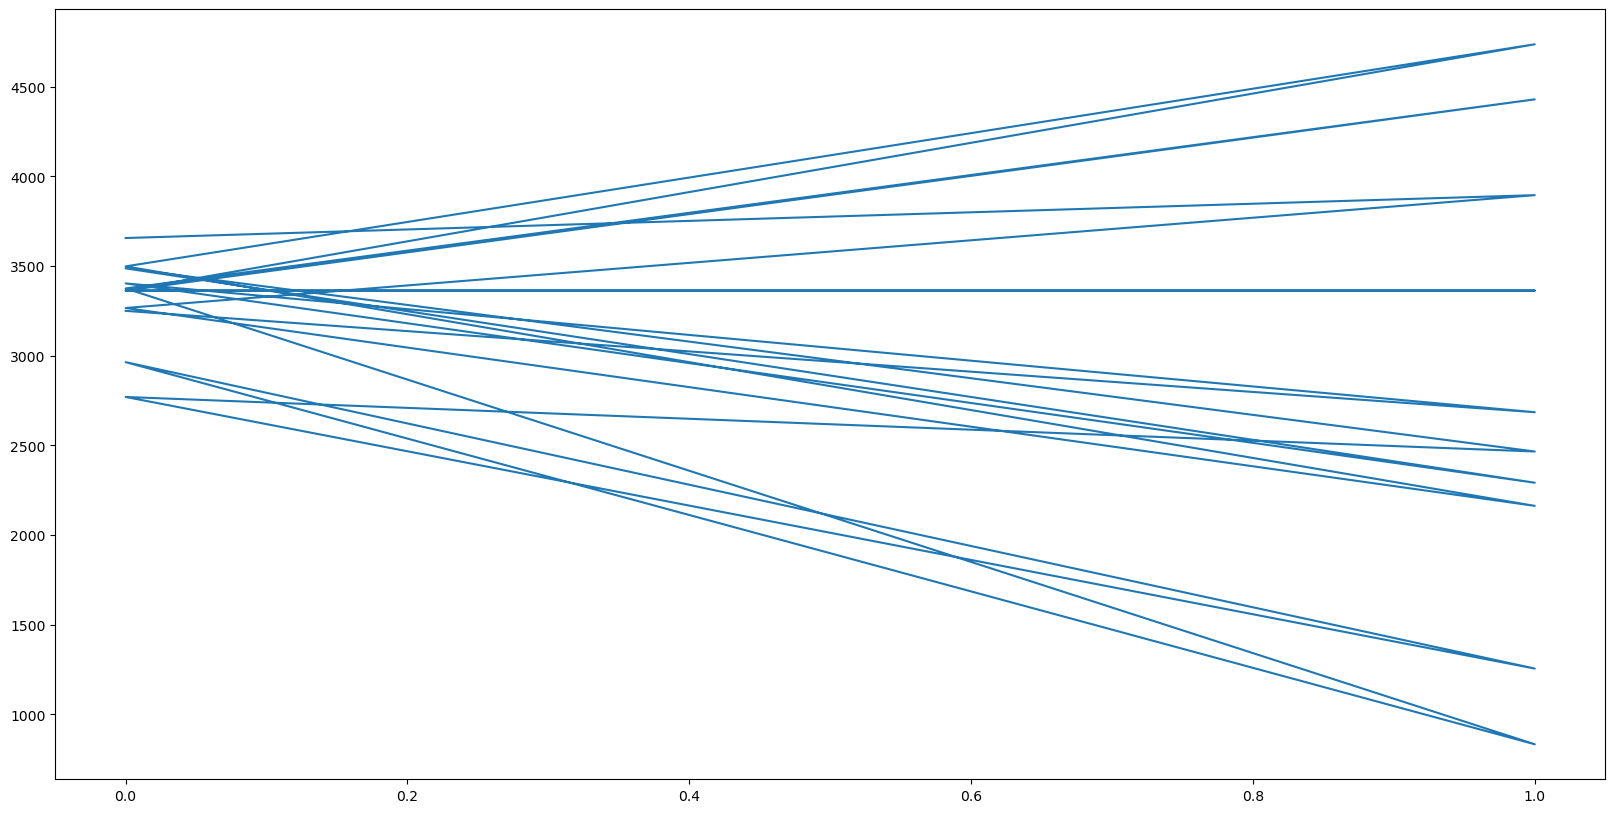

In [33]:
# visualizes the rotation
df.index = df['Maintenance']
plt.plot(df["Rotation"],label='Rotation Maintenance')

In [34]:
# creates subset specific to rotation
df = df[['Maintenance', 'Rotation']]
df.head()

,Maintenance,Rotation
Maintenance,,
0,0,3250
1,1,2685
0,0,3403
1,1,2292
0,0,3487


In [35]:
# manually creates a dataframe, errors when using for loop
# source stackoverflow.com
df = df.sort_index(ascending=True,axis=0)

data = pd.DataFrame({'Maintenance':[0,1,0,1,0,1,0,1,0,1,0,1,
                                    0,1,0,1,0,1,0,1,0],
                     'Vibration':[0.4,0.04,0.45,0.76,0.3,
                                 0.3,0.3,0.3,0.3,0.01,
                                 0.43,1,0.33,0.33,0.33,
                                 0.33,0.33,0.33,0.33,0.33,0.33],
                     'Temperature':[40,92,46,46,46,
                                 67,42,42,42,28,
                                 49,45,32,32,32,
                                 40,35,35,35,11,43],
                     'Pressure_Difference':[2.8,2.9,3,0.3,3,
                                 3,3,2.2,2.8,2.8,
                                 2.8,2.8,2.8,3.3,2.8,
                                 1.9,2.6,2.6,2.6,1.8,2.8],
                     'Electric_Flow':[120,2,124,5,127,
                                 127,127,127,127,38,
                                 124,68,128,128,128,
                                 74,110,56,123,114,124],
                     'Rotation':[3250,2685,3403,2292,3487,
                                 2466,2770,1256,2964,834,
                                 3375,4429,3363,3363,3363,
                                 4736,3498,2163,3266,3895,3656]})
min_max_scaler = preprocessing.MinMaxScaler()

data.head()

,Maintenance,Vibration,Temperature,Pressure_Difference,Electric_Flow,Rotation
0,0,0.40,40,2.8,120,3250
1,1,0.04,92,2.9,2,2685
2,0,0.45,46,3.0,124,3403
3,1,0.76,46,0.3,5,2292
4,0,0.30,46,3.0,127,3487


In [36]:
# my attempt at using for loop to enter data into dataframe

#df = df.sort_index(ascending=True,axis=0)
#data = pd.DataFrame(index=range(0,len(df)),columns=['Maintenance','Rotation'])

#for i in range(0,len(data)):
    #data["Maintenance"][i]=df['Maintenance'][i]
    #data["Rotation"][i]=df["Rotation"][i]
#data.head()

In [37]:
# min max scalar
scaler=MinMaxScaler(feature_range=(0,1))
data.index=data.Maintenance
data.drop(['Maintenance'],axis=1,inplace=True)

final_data = data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]
scaler=MinMaxScaler(feature_range=(0,1))

scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
data.head() # verifies that data is being stored

,Vibration,Temperature,Pressure_Difference,Electric_Flow,Rotation
Maintenance,,,,,
0,0.40,40,2.8,120,3250
1,0.04,92,2.9,2,2685
0,0.45,46,3.0,124,3403
1,0.76,46,0.3,5,2292
0,0.30,46,3.0,127,3487


In [39]:
# LSTM model creation
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

IndexError: tuple index out of range